In [1]:
import sys
from os import path
print(path.dirname( path.dirname( path.abspath("__file__") ) ))
sys.path.append(path.dirname( path.dirname( path.abspath("__file__") ) ))


/Volumes/DATA/Code/Daily_Coding/stock_analysis


In [2]:
from Invester.MarketDB import MarketDB

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

/Users/hongjinseog/opt/anaconda3/envs/py39/lib/python3.9/site-packages/pandas/io/sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(
/Users/hongjinseog/opt/anaconda3/envs/py39/lib/python3.9/site-packages/pandas/io/sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(
/Users/hongjinseog/opt/anaconda3/envs/py39/lib/python3.9/site-packages/pandas/io/sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(
/Users/hongjinseog/opt/anaconda3/envs/py39/lib/python3.9/site-packages/pandas/io/sql.

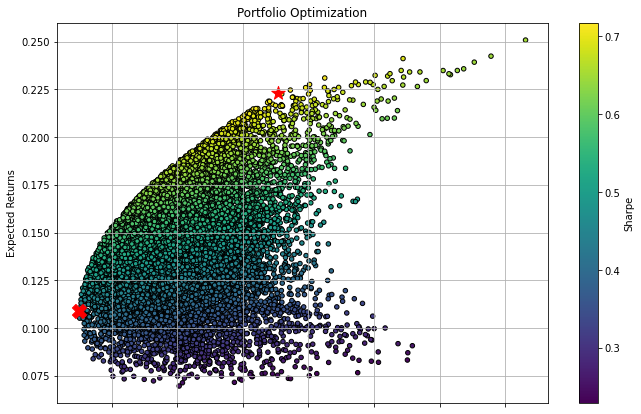

In [21]:
mk = MarketDB()
stocks = ['삼성전자', 'SK하이닉스', '현대자동차', 'NAVER']
df = pd.DataFrame()
for s in stocks:
    df[s] = mk.get_daily_price(s, '2020-01-01', '2022-08-22')['close']

daily_ret = df.pct_change()
annual_ret = daily_ret.mean() * 252
daily_cov = daily_ret.cov()
annual_cov = daily_cov * 252

port_ret = []
port_risk = []
port_weights = []
sharpe_ratio = []

for _ in range(20000):
    weights = np.random.random(len(stocks))
    weights /= np.sum(weights)

    returns = np.dot(weights, annual_ret)
    risk = np.sqrt(np.dot(weights.T, np.dot(annual_cov, weights)))

    port_ret.append(returns)
    port_risk.append(risk)
    port_weights.append(weights)
    sharpe_ratio.append(returns/risk)

portfolio = {"Returns": port_ret, 'Risk': port_risk, 'Sharpe': sharpe_ratio}
for i, s in enumerate(stocks):
    portfolio[s] = [weight[i] for weight in port_weights]
df = pd.DataFrame(portfolio)
df = df[['Returns', 'Risk', 'Sharpe'] + [s for s in stocks]]

max_sharpe = df.loc[df['Sharpe'] == df['Sharpe'].max()]
min_risk = df.loc[df['Risk'] == df['Risk'].min()]

df.plot.scatter(x='Risk', y='Returns', c='Sharpe', cmap='viridis', edgecolors='k', figsize=(11, 7), grid=True)
plt.scatter(x=max_sharpe['Risk'], y=max_sharpe['Returns'], c='r', marker='*', s=200)
plt.scatter(x=min_risk['Risk'], y=min_risk['Returns'], c='r', marker='X', s=200)
plt.title('Portfolio Optimization')
plt.xlabel('Risk')
plt.ylabel('Expected Returns')
plt.show()


In [22]:
max_sharpe

,Returns,Risk,Sharpe,삼성전자,SK하이닉스,현대자동차,NAVER
7972,0.222833,0.310657,0.717297,0.01177,0.007337,0.57239,0.408503


In [23]:
min_risk

,Returns,Risk,Sharpe,삼성전자,SK하이닉스,현대자동차,NAVER
15358,0.109065,0.250037,0.436198,0.684206,0.002323,0.083373,0.230098
